<a href="https://colab.research.google.com/github/s9b/bike-rental-and-sharing-analysis/blob/main/bike_rental_and_sharing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load daily dataset
day_data = pd.read_csv('/content/Drive/MyDrive/mlproject/day.csv')
# Load hourly dataset
hour_data = pd.read_csv('/content/Drive/MyDrive/mlproject/hour.csv')


In [ ]:
# For simplicity, let's consider a few features from the daily dataset
X = day_data[['temp', 'hum', 'windspeed']]  # Features
y = day_data['cnt']  # Target (count of total rentals)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2105896.376682209
R^2 Score: 0.4707428171027941


Mean Squared Error: 2391051.8856316973
R^2 Score: 0.40371020554910975


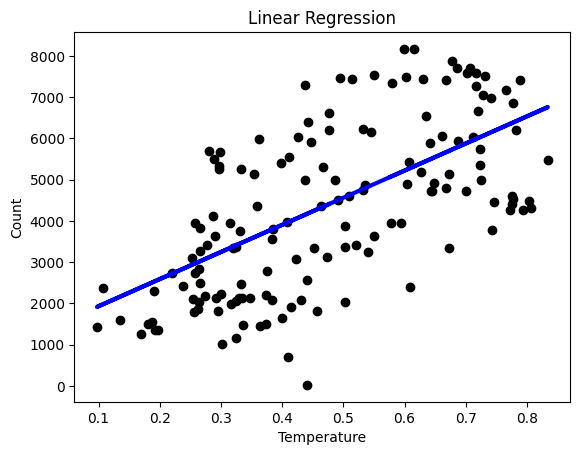

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example using day_data
# Define features and target variable
X_day = day_data[['temp']]  # example feature
y_day = day_data['cnt']     # example target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_day, y_day, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.show()

Mean Squared Error: 2105896.376682209
R^2 Score: 0.4707428171027941


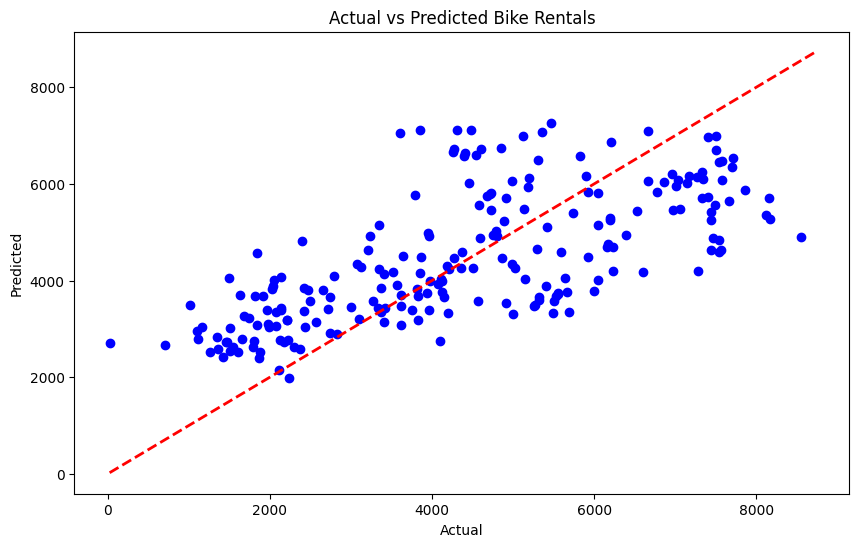

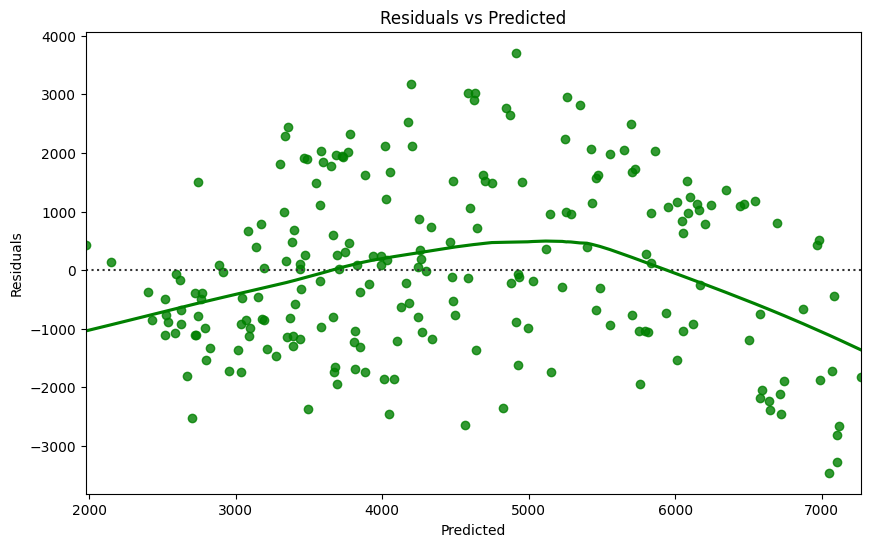

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
day_data = pd.read_csv('/content/Drive/MyDrive/mlproject/day.csv')

# Select features and target
X = day_data[['temp', 'hum', 'windspeed']]
y = day_data['cnt']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()

# Residual plot
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="g")
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

[[95 23]
 [24 78]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       118
           1       0.77      0.76      0.77       102

    accuracy                           0.79       220
   macro avg       0.79      0.78      0.79       220
weighted avg       0.79      0.79      0.79       220



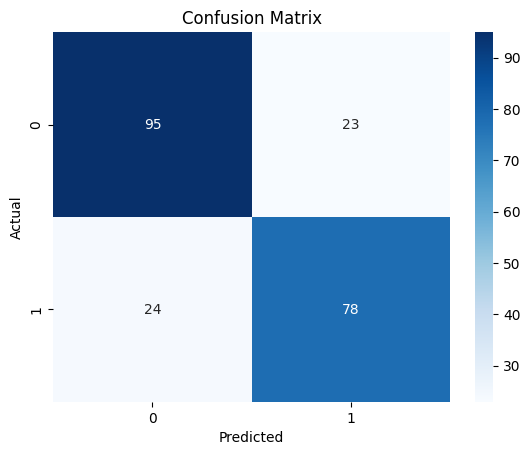

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create a binary target: High rentals (>= median) or Low rentals (< median)
day_data['high_rentals'] = (day_data['cnt'] >= day_data['cnt'].median()).astype(int)

# Select features and new binary target
X = day_data[['temp', 'hum', 'windspeed']]
y = day_data['high_rentals']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[95 23]
 [24 78]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       118
           1       0.77      0.76      0.77       102

    accuracy                           0.79       220
   macro avg       0.79      0.78      0.79       220
weighted avg       0.79      0.79      0.79       220



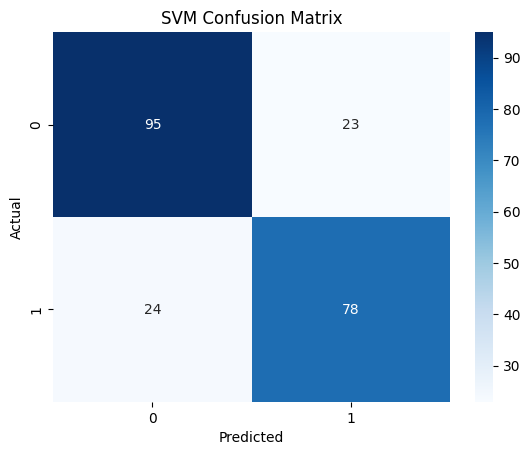

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

[[93 25]
 [26 76]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       118
           1       0.75      0.75      0.75       102

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



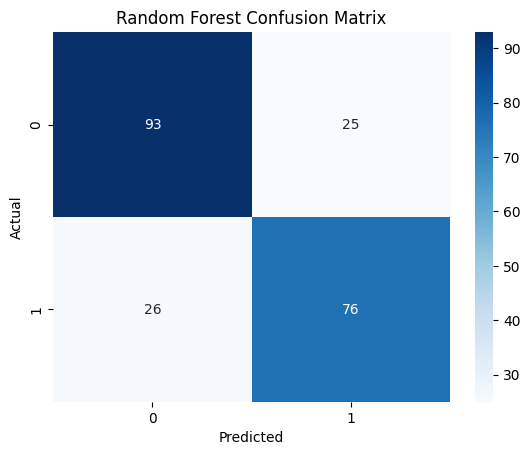

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

[[78 40]
 [28 74]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       118
           1       0.65      0.73      0.69       102

    accuracy                           0.69       220
   macro avg       0.69      0.69      0.69       220
weighted avg       0.70      0.69      0.69       220



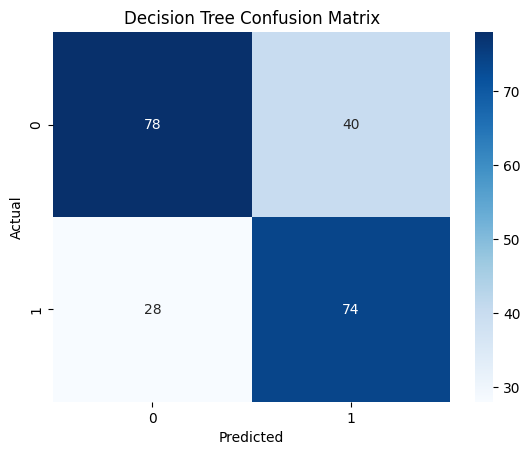

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

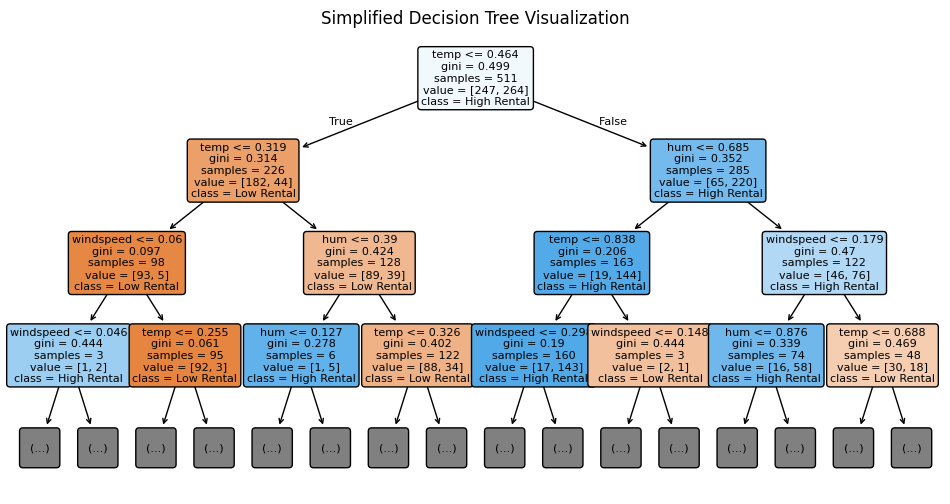

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Limit the visualization depth and adjust the figure size for a clearer view
plt.figure(figsize=(12, 6))  # Set a smaller figure size
plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=['Low Rental', 'High Rental'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)  # Adjust to show the top 3 levels for clarity
plt.title('Simplified Decision Tree Visualization')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model (or any other model you're analyzing)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on both the training and testing data
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.7827788649706457
Testing Accuracy: 0.7863636363636364


In [ ]:
from scipy.stats import ttest_ind

# Assuming 'weekday' is a binary column (0 for weekend, 1 for weekday)
weekday_rentals = day_data[day_data['weekday'] == 1]['cnt']
weekend_rentals = day_data[day_data['weekday'] == 0]['cnt']

# Perform T-test
t_stat, p_value = ttest_ind(weekday_rentals, weekend_rentals)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: 0.43198371475934083
P-Value: 0.6662007194118499


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

# Create a contingency table comparing predictions
contingency_table = pd.crosstab(y_pred_logistic, y_pred_svm)

# Perform McNemar's test
result = mcnemar(contingency_table, exact=False)
print(f'McNemar’s Test Statistic: {result.statistic}')
print(f'P-Value: {result.pvalue}')

McNemar’s Test Statistic: inf
P-Value: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/contingency_tables.py:1348: RuntimeWarning: divide by zero encountered in scalar divide
  statistic = (np.abs(n1 - n2) - corr)**2 / (1. * (n1 + n2))


In [ ]:
from scipy.stats import f_oneway

# Group bike rentals by season (assuming 'season' is categorical)
spring = day_data[day_data['season'] == 1]['cnt']
summer = day_data[day_data['season'] == 2]['cnt']
fall = day_data[day_data['season'] == 3]['cnt']
winter = day_data[day_data['season'] == 4]['cnt']

# Perform F-test (ANOVA)
f_stat, p_value = f_oneway(spring, summer, fall, winter)

print(f'F-Statistic: {f_stat}')
print(f'P-Value: {p_value}')

F-Statistic: 128.76962156570784
P-Value: 6.720391362913176e-67


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (assuming 'X' is your features and 'y' is your target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN model with K=5 (you can experiment with different values for K)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model using a confusion matrix and classification report
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


Confusion Matrix for KNN:
[[92 26]
 [24 78]]

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       118
           1       0.75      0.76      0.76       102

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



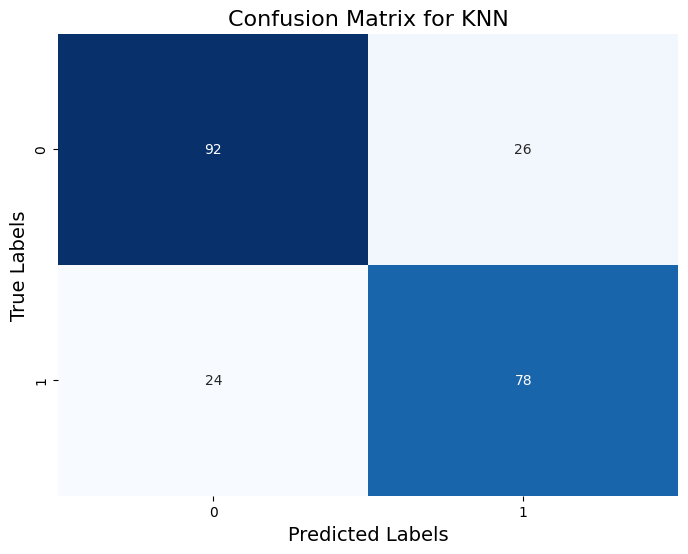

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


Confusion Matrix for Logistic Regression with L1 Regularization:
[[100  18]
 [ 26  76]]

Classification Report for Logistic Regression with L1 Regularization:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       118
           1       0.81      0.75      0.78       102

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



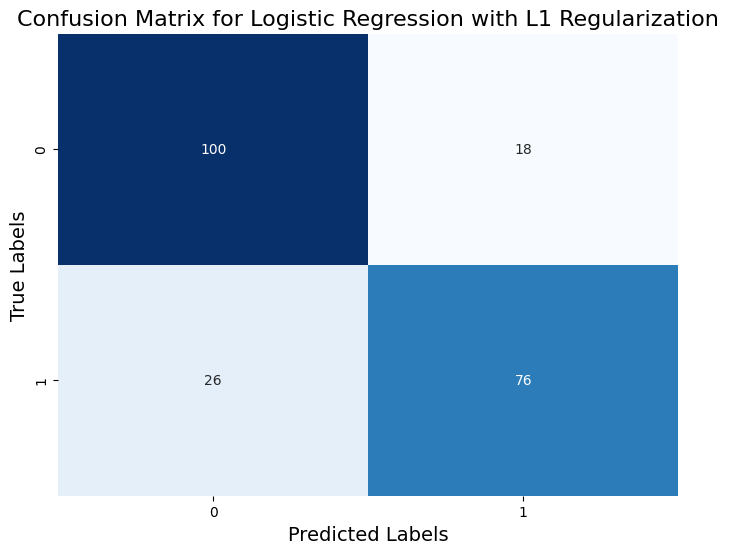

In [ ]:
from sklearn.linear_model import LogisticRegression

# Apply L1 regularization using the 'C' parameter and 'liblinear' solver (supports L1)
logreg_l1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)

# Train the logistic regression model with L1 regularization
logreg_l1.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg_l1 = logreg_l1.predict(X_test)

# Evaluate the model with a confusion matrix and classification report
print("Confusion Matrix for Logistic Regression with L1 Regularization:")
conf_matrix_logreg_l1 = confusion_matrix(y_test, y_pred_logreg_l1)
print(conf_matrix_logreg_l1)

print("\nClassification Report for Logistic Regression with L1 Regularization:")
print(classification_report(y_test, y_pred_logreg_l1))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_logreg_l1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression with L1 Regularization', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


Confusion Matrix for Logistic Regression with L2 Regularization:
[[100  18]
 [ 25  77]]

Classification Report for Logistic Regression with L2 Regularization:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       118
           1       0.81      0.75      0.78       102

    accuracy                           0.80       220
   macro avg       0.81      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



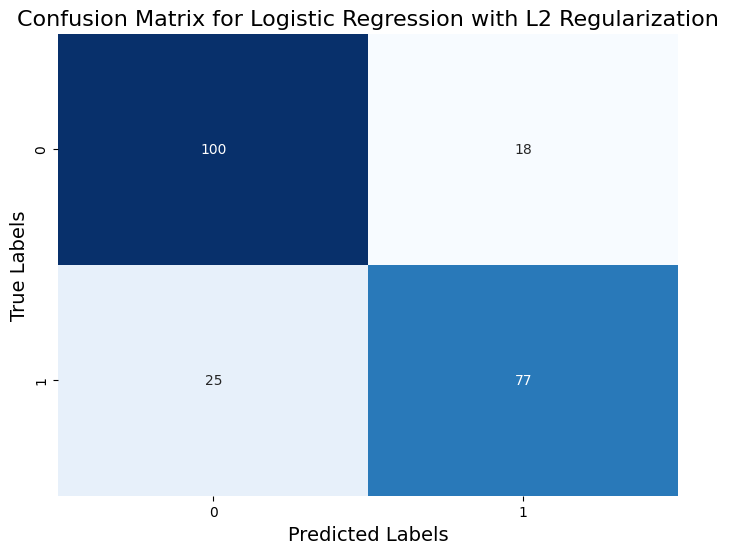

In [ ]:
from sklearn.linear_model import LogisticRegression

# Apply L2 (Ridge) regularization using the 'C' parameter
logreg = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=1000)

# Train the logistic regression model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model with a confusion matrix and classification report
print("Confusion Matrix for Logistic Regression with L2 Regularization:")
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix_logreg)

print("\nClassification Report for Logistic Regression with L2 Regularization:")
print(classification_report(y_test, y_pred_logreg))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression with L2 Regularization', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


[[95 23]
 [24 78]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       118
           1       0.77      0.76      0.77       102

    accuracy                           0.79       220
   macro avg       0.79      0.78      0.79       220
weighted avg       0.79      0.79      0.79       220



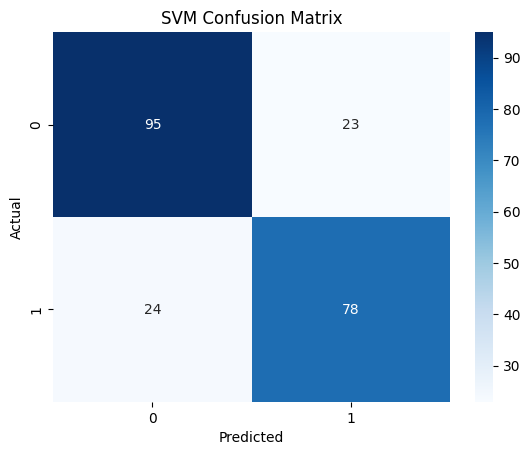

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the same 70/30 split ratio for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train a Linear SVM model
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train, y_train)

# Predict using the Linear SVM model
y_pred_linear = linear_svm.predict(X_test)

# Evaluate the model
print("Confusion Matrix for Linear SVM:")
print(confusion_matrix(y_test, y_pred_linear))
print("Classification Report for Linear SVM:")
print(classification_report(y_test, y_pred_linear))


Confusion Matrix for Linear SVM:
[[95 23]
 [24 78]]
Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       118
           1       0.77      0.76      0.77       102

    accuracy                           0.79       220
   macro avg       0.79      0.78      0.79       220
weighted avg       0.79      0.79      0.79       220



In [ ]:
# Train a Non-linear SVM model with RBF kernel
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train, y_train)

# Predict using the Non-linear SVM model
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluate the model
print("Confusion Matrix for RBF SVM:")
print(confusion_matrix(y_test, y_pred_rbf))
print("Classification Report for RBF SVM:")
print(classification_report(y_test, y_pred_rbf))


Confusion Matrix for RBF SVM:
[[92 26]
 [18 84]]
Classification Report for RBF SVM:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       118
           1       0.76      0.82      0.79       102

    accuracy                           0.80       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.80      0.80      0.80       220



In [ ]:
# Train a Multi-class SVM model using One-vs-Rest strategy
from sklearn.multiclass import OneVsRestClassifier

multi_class_svm = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
multi_class_svm.fit(X_train, y_train)

# Predict using the Multi-class SVM model
y_pred_multi = multi_class_svm.predict(X_test)

# Evaluate the model
print("Confusion Matrix for Multi-class SVM (OvR):")
print(confusion_matrix(y_test, y_pred_multi))
print("Classification Report for Multi-class SVM (OvR):")
print(classification_report(y_test, y_pred_multi))


Confusion Matrix for Multi-class SVM (OvR):
[[95 23]
 [24 78]]
Classification Report for Multi-class SVM (OvR):
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       118
           1       0.77      0.76      0.77       102

    accuracy                           0.79       220
   macro avg       0.79      0.78      0.79       220
weighted avg       0.79      0.79      0.79       220



[[93 25]
 [25 77]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       118
           1       0.75      0.75      0.75       102

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



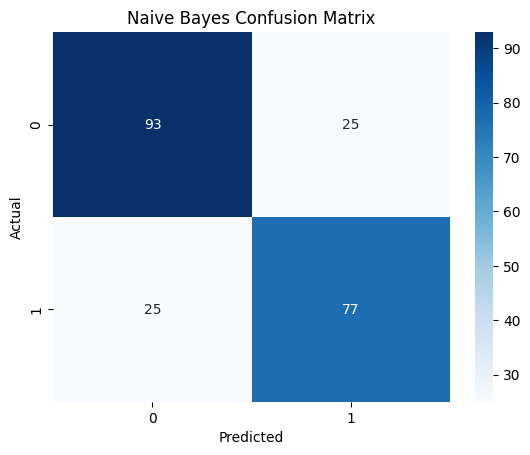

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


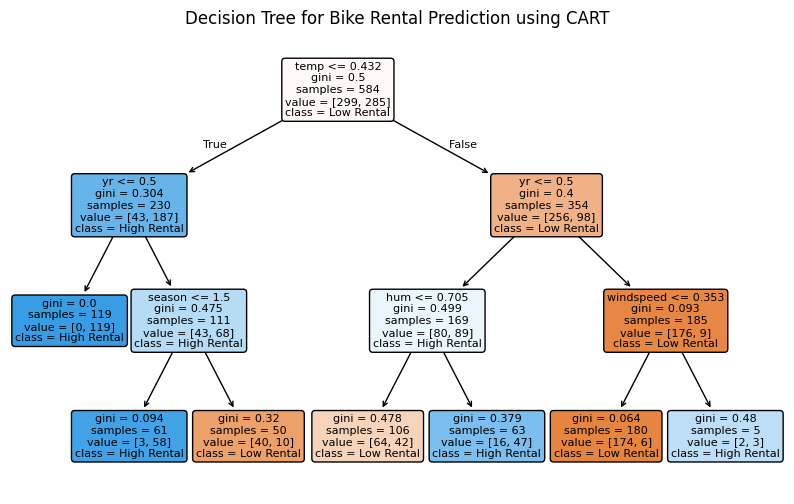

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Drive/MyDrive/mlproject/day.csv')

# Define feature columns and target column
X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

# Convert 'cnt' to categorical (binned into 'Low Rental' and 'High Rental')
y = pd.qcut(y, 2, labels=['Low Rental', 'High Rental'])  # Use qcut for quantile-based binning

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the Decision Tree Classifier with CART (Gini impurity)
clf = DecisionTreeClassifier(criterion='gini', random_state=5, max_depth=3)  # Using CART with max_depth to simplify the tree

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the Decision Tree with smaller plot settings
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=X.columns, filled=True, rounded=True, class_names=['Low Rental', 'High Rental'], fontsize=8)
plt.title("Decision Tree for Bike Rental Prediction using CART")
plt.show()


Accuracy: 90.48%

Classification Report:
               precision    recall  f1-score   support

 High Rental       0.91      0.88      0.89        66
  Low Rental       0.90      0.93      0.91        81

    accuracy                           0.90       147
   macro avg       0.90      0.90      0.90       147
weighted avg       0.90      0.90      0.90       147



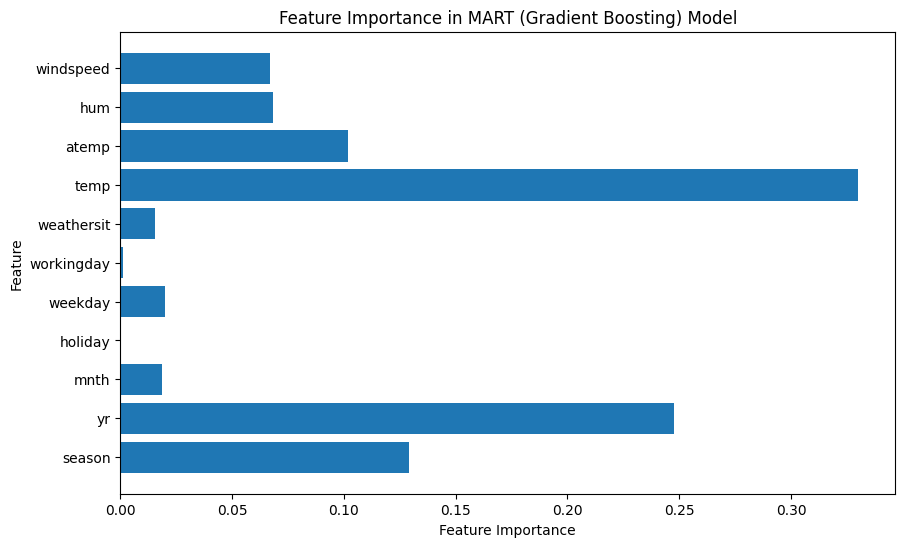

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('/content/Drive/MyDrive/mlproject/day.csv')

# Define feature columns and target column
# In this case, we'll predict 'cnt' (the total count of bike rentals)
X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

# Convert 'cnt' to categorical based on thresholds (e.g., median)
# This creates two classes: 'Low Rental' and 'High Rental'
y = pd.qcut(y, 2, labels=['Low Rental', 'High Rental'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the Gradient Boosting Classifier (MART implementation)
# You can adjust 'n_estimators' and 'learning_rate' to improve performance
mart_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=5)

# Train the MART model
mart_model.fit(X_train, y_train)

# Make predictions
y_pred = mart_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Feature importance plot (to understand what features were most influential)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, mart_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in MART (Gradient Boosting) Model")
plt.show()


Fanaee-T,Hadi. (2013). Bike Sharing. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.